In [171]:
import datetime
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [172]:
start = datetime.datetime(2015,1,1)
end = datetime.datetime(2023,11,7)

In [173]:
stocks_codes = [
    "MGLU3.SA", "HAPV3.SA", "BBDC4.SA", "ITUB4.SA", "PETR4.SA", "B3SA3.SA", "VALE3.SA", "CIEL3.SA"
]

ibov = yf.download("BOVA11.SA", start=start, end=end, progress=True, interval='1mo')
stocks = yf.download(stocks_codes, start=start, end=end, progress=True, interval='1mo')

# daily returns
# stocks = yf.download(stocks_codes, start=start, end=end, progress=True)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  8 of 8 completed


In [174]:
stocks = stocks['Close']
ibov = ibov['Close']

In [175]:
stocks_codes = stocks.columns
stocks_codes

Index(['B3SA3.SA', 'BBDC4.SA', 'CIEL3.SA', 'HAPV3.SA', 'ITUB4.SA', 'MGLU3.SA',
       'PETR4.SA', 'VALE3.SA'],
      dtype='object')

In [176]:
stocks.head()

,B3SA3.SA,BBDC4.SA,CIEL3.SA,HAPV3.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,VALE3.SA
Date,,,,,,,,
2015-01-01,3.066666,13.222017,23.148148,NaN,18.126720,0.212500,8.30,18.610001
2015-02-01,3.360000,14.739041,25.873842,NaN,20.110191,0.189062,9.55,21.250000
2015-03-01,3.706666,13.900170,26.440971,NaN,19.454544,0.159062,9.66,17.940001
2015-04-01,4.146666,15.137309,29.097221,NaN,21.228649,0.157187,13.06,22.650000
2015-05-01,3.733333,13.265137,27.680555,NaN,18.914600,0.133750,12.33,20.049999


Retornos

Formula: rt / rt-1 (preço do hj / preço de ontem)

In [177]:
returns = stocks/stocks.shift(1)
ibov_returns = ibov/ibov.shift(1)

In [178]:
returns.tail()

,B3SA3.SA,BBDC4.SA,CIEL3.SA,HAPV3.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,VALE3.SA
Date,,,,,,,,
2023-07-01,1.019849,1.012766,1.028322,1.095890,1.007741,0.994065,1.053505,1.076923
2023-08-01,0.867785,0.897359,0.788136,0.887500,0.957751,0.823881,1.026680,0.941006
2023-09-01,0.950503,0.956522,0.943548,1.103286,0.991980,0.768116,1.084533,1.038414
2023-10-01,0.903173,0.978322,1.002849,0.785106,0.985667,0.627359,1.002887,1.021012
2023-11-01,1.102703,1.055039,1.036932,1.078591,1.051081,1.075188,1.022165,1.036232


Vamos tirar o LOG a fim de normalizar os retornos, para que possa ser utilizado de maneira mais eficaz no modelo de Markowitz

In [179]:
#Transformando os retornos em LOG

logReturns = np.log(returns)
ibov = np.log(ibov_returns)
logReturns.tail()

,B3SA3.SA,BBDC4.SA,CIEL3.SA,HAPV3.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,VALE3.SA
Date,,,,,,,,
2023-07-01,0.019655,0.012685,0.027929,0.091567,0.007711,-0.005952,0.052123,0.074108
2023-08-01,-0.141811,-0.108299,-0.238085,-0.119347,-0.043167,-0.193730,0.026330,-0.060805
2023-09-01,-0.050764,-0.044452,-0.058108,0.098293,-0.008053,-0.263815,0.081150,0.037695
2023-10-01,-0.101841,-0.021917,0.002845,-0.241936,-0.014437,-0.466237,0.002883,0.020794
2023-11-01,0.097764,0.053578,0.036266,0.075655,0.049819,0.072495,0.021922,0.035591


In [180]:
filtered_df = logReturns # Caso deseje aplicar algum filtro no data frame
filtered_df.head()

,B3SA3.SA,BBDC4.SA,CIEL3.SA,HAPV3.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,VALE3.SA
Date,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,0.091350,0.108616,0.111318,NaN,0.103840,-0.116867,0.140286,0.132658
2015-03-01,0.098192,-0.058599,0.021682,NaN,-0.033146,-0.172781,0.011452,-0.169324
2015-04-01,0.112172,0.085261,0.095728,NaN,0.087271,-0.011858,0.301561,0.233127
2015-05-01,-0.105003,-0.132023,-0.049912,NaN,-0.115418,-0.161464,-0.057519,-0.121931


In [181]:
ibov

Date
2015-01-01         NaN
2015-02-01    0.092096
2015-03-01   -0.010250
2015-04-01    0.098427
2015-05-01   -0.061735
                ...   
2023-07-01    0.032572
2023-08-01   -0.048998
2023-09-01    0.007452
2023-10-01   -0.031695
2023-11-01    0.046259
Name: Close, Length: 107, dtype: float64

In [182]:
# Cálculo dos betas

betas = []
betas_show = []

for st in stocks_codes:
  filtered_df = logReturns[logReturns[st].notnull()]
  corr = np.cov(filtered_df[st], ibov[-len(filtered_df):])
  betas_show.append({'ativo': st, 'beta': corr[0][1]/(np.var(ibov))})
  betas.append(corr[0][1]/(np.var(ibov)))

betas_show

[{'ativo': 'B3SA3.SA', 'beta': 1.1119131348893414},
 {'ativo': 'BBDC4.SA', 'beta': 1.2504681493943273},
 {'ativo': 'CIEL3.SA', 'beta': 0.9056688790069899},
 {'ativo': 'HAPV3.SA', 'beta': 1.2488599979648354},
 {'ativo': 'ITUB4.SA', 'beta': 1.0985981542063357},
 {'ativo': 'MGLU3.SA', 'beta': 1.3546562665544215},
 {'ativo': 'PETR4.SA', 'beta': 1.6842944492150753},
 {'ativo': 'VALE3.SA', 'beta': 0.794097670174303}]

In [183]:
logReturns.mean()

B3SA3.SA    0.013058
BBDC4.SA    0.001038
CIEL3.SA   -0.017426
HAPV3.SA   -0.006219
ITUB4.SA    0.004166
MGLU3.SA    0.017986
PETR4.SA    0.013713
VALE3.SA    0.012698
dtype: float64

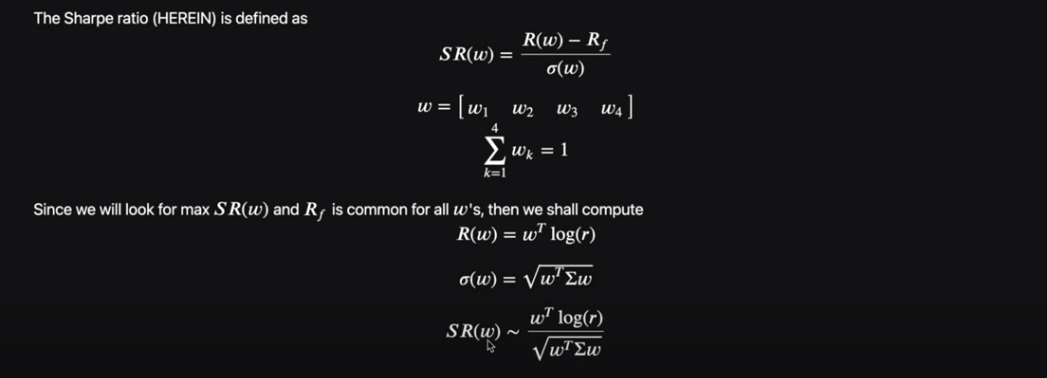

O índice Sharpe, apesar de conter o Risk Free, no caso de aplicação, não se faz necessário usá-lo, visto que o intuito é maximizar o índice de sharpe. Sendo assim, adicionar ou não o Risk Free no cálculo não vai fazer diferença, visto que o Rf seria aplicado para todas as contas, se tornando uma constante, não impactando a conta. Devido a isso, o Risk Free foi omitido, ele só seria importante se de fato fossemos utilizar o Valor do índice de sharpe em sua essência.

A partir do código abaixo, a secção irá simular 10000 carteiras, com pesos aleatórios afim de encontrar a que maximize o índice de Sharpe.
Obs: Esse não é o método adequado de maximização, visto que pode acarretar erros e respostas diferentes e não chegar no portfólio ótimo, pois pode acontecer dos pesos não serem sorteados da maneira correta nenhuma vez, o que é o mais provavel de ocorrer. Ou seja, apesar de se aproximar do portólio ótimo, não é exatamente ele. O que vai agravando ainda mais o erro, quantos mais portfólios forem entrando na carteira.

In [184]:
meanLogReturns = logReturns.mean() # Média dos retornos
Sigma          = logReturns.cov() # Matriz de covariancia

In [185]:
Sigma

,B3SA3.SA,BBDC4.SA,CIEL3.SA,HAPV3.SA,ITUB4.SA,MGLU3.SA,PETR4.SA,VALE3.SA
B3SA3.SA,0.009755,0.007109,0.004885,0.009208,0.006050,0.007869,0.008185,0.003081
BBDC4.SA,0.007109,0.009714,0.005527,0.007644,0.007767,0.007561,0.009686,0.003521
CIEL3.SA,0.004885,0.005527,0.013900,0.004268,0.004794,0.003119,0.006524,0.001628
HAPV3.SA,0.009208,0.007644,0.004268,0.021954,0.006782,0.016016,0.008205,-0.000065
ITUB4.SA,0.006050,0.007767,0.004794,0.006782,0.007736,0.006333,0.008398,0.003234
MGLU3.SA,0.007869,0.007561,0.003119,0.016016,0.006333,0.044327,0.008274,0.006709
PETR4.SA,0.008185,0.009686,0.006524,0.008205,0.008398,0.008274,0.018626,0.006762
VALE3.SA,0.003081,0.003521,0.001628,-0.000065,0.003234,0.006709,0.006762,0.013247


In [186]:
meanLogReturns

B3SA3.SA    0.013058
BBDC4.SA    0.001038
CIEL3.SA   -0.017426
HAPV3.SA   -0.006219
ITUB4.SA    0.004166
MGLU3.SA    0.017986
PETR4.SA    0.013713
VALE3.SA    0.012698
dtype: float64

In [187]:
# MAXIMIZANDO Índice Sharpe
from scipy.optimize import minimize

def negativeSR(w):
  w = np.array(w)
  R = np.sum(meanLogReturns*w)
  V = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))
  SR = R / V
  return -1*SR

def checkSumToOne(w):
  return np.sum(w) - 1

w0 = np.full(len(stocks_codes), 1/len(stocks_codes))
bounds = [(0,1)] * len(stocks_codes)

constraints = ({'type': 'eq', 'fun':checkSumToOne})
w_opt = minimize(negativeSR, w0, method='SLSQP', bounds=bounds, constraints=constraints)

# % de cada ação na carteira
print(np.round(w_opt.x, decimals=2, out=None))

# Retorno médio da carteira
print(np.sum(meanLogReturns*w_opt.x))

# Desv-pad da carteira
print(np.sqrt(np.dot(w_opt.x.T, np.dot(Sigma, w_opt.x))))

[0.57 0.   0.   0.   0.   0.07 0.   0.36]
0.01326288786444161
0.08557209994712046


In [188]:
porcents = np.round(w_opt.x, decimals=2, out=None)

x = {}
for count, percent in enumerate(porcents):
  x[stocks_codes[count]] = percent

x

{'B3SA3.SA': 0.57,
 'BBDC4.SA': 0.0,
 'CIEL3.SA': 0.0,
 'HAPV3.SA': 0.0,
 'ITUB4.SA': 0.0,
 'MGLU3.SA': 0.07,
 'PETR4.SA': 0.0,
 'VALE3.SA': 0.36}

In [189]:
# Calculando fronteira eficiente

returns = np.linspace(0, 0.017, 100)
volatility_opt = []
wallets = []

def minimizeVolatility(w):
  w = np.array(w)
  V = np.sqrt(np.dot(w.T, np.dot(Sigma, w)))
  return V

def getReturn(w):
  w = np.array(w)
  R = np.sum(meanLogReturns*w)
  return R

for R in returns:
  constraints_volatility = ({'type': 'eq', 'fun':checkSumToOne},
                            {'type': 'eq', 'fun': lambda w: getReturn(w) - R})
  opt = minimize(minimizeVolatility, w0, method='SLSQP', bounds=bounds, constraints=constraints_volatility)
  volatility_opt.append(opt['fun'])
  wallets.append(opt.x)


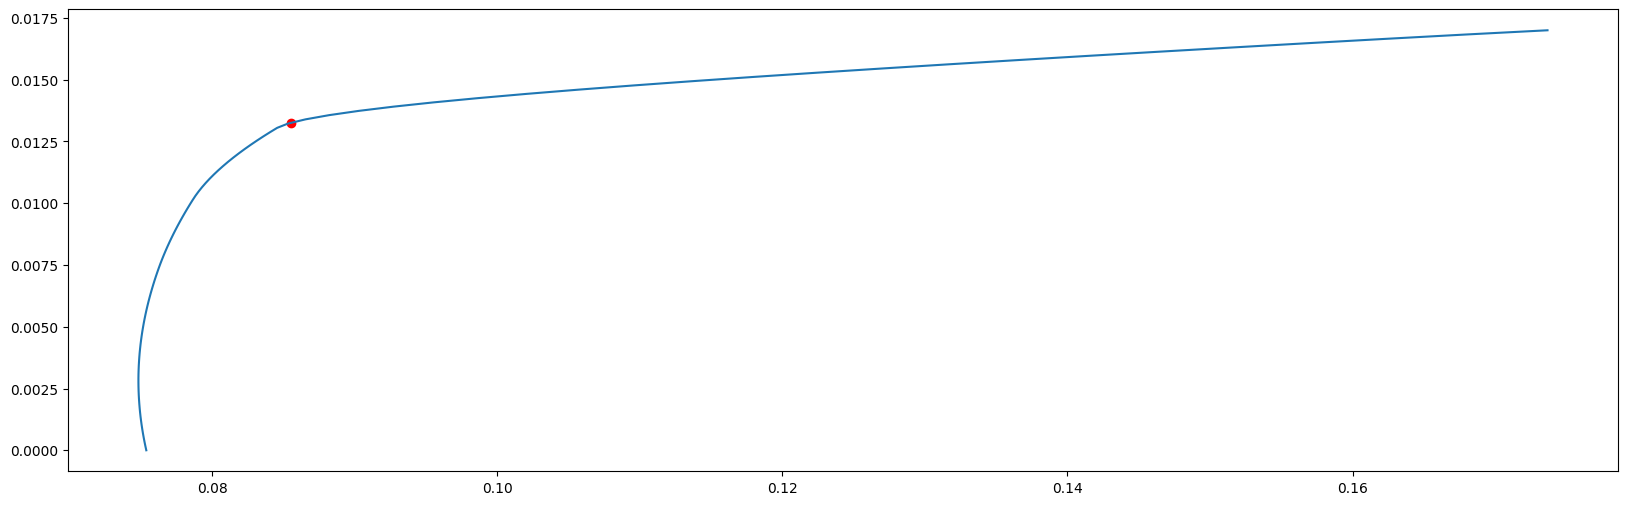

In [190]:
# Plot da fronteira eficiente

plt.figure(figsize=(20,6))
plt.plot(volatility_opt, returns)
plt.scatter(np.sqrt(np.dot(w_opt.x.T, np.dot(Sigma, w_opt.x))) ,np.sum(meanLogReturns*w_opt.x), c='red')
plt.show()